In [67]:
import pandas as pd
import numpy  as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

Web scraped data of 10,000 Play Store apps for analysing the Android market found on Kaggle, https://www.kaggle.com/lava18/google-play-store-apps

In [68]:
playstore_df = pd.read_csv('https://raw.githubusercontent.com/SansBasnet/Recommendation_Engine/main/googleplaystore.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/SansBasnet/Recommendation_Engine/main/googleplaystore_user_reviews.csv')

In [69]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
reviews_df.head()
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [71]:
playstore_df.sort_values('App', inplace=True) 

In [72]:
playstore_df.drop_duplicates(subset='App', inplace=True) #Remove duplicates

In [73]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [74]:
#new df containing the average sentiment polarity and sentiment subjectivity for each app.
reviews_summary_df = pd.DataFrame(reviews_df.groupby('App').mean())
reviews_summary_df.head()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.181294,0.443957
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315


In [75]:
reviews_summary_df.sort_values('App', inplace=True)
reviews_summary_df.head()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.181294,0.443957
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315


In [76]:
#two dataframes merger with 'App' key. 
app_review_df = pd.merge(playstore_df, reviews_summary_df, on='App', how='left')
app_review_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,NaN,NaN
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,NaN,NaN
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,NaN,NaN
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,NaN,NaN
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,NaN,NaN
9656,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,NaN,NaN
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,NaN,NaN
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,NaN,NaN


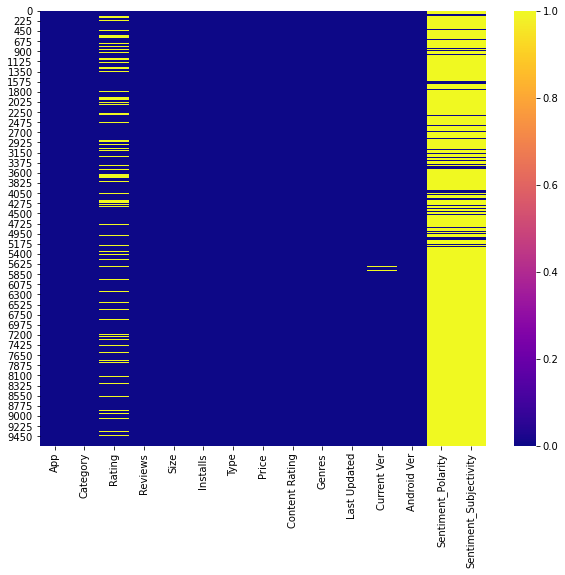

In [77]:
# Checking Null values  
plt.figure(figsize=(10,8))
sns.heatmap(app_review_df.isnull(),cmap='plasma')

def percent_missing(d):
    percentage = pd.DataFrame(100*(d.isnull().sum()/len(d)),columns=['Missing_%']).sort_values('Missing_%',ascending=False)
    return (percentage.head(10))

In [78]:
app_review_df['Sentiment_Polarity'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
9655    True
9656    True
9657    True
9658    True
9659    True
Name: Sentiment_Polarity, Length: 9660, dtype: bool

In [79]:
# Select features
selections = ['App','Category','Rating','Type','Genres','Sentiment_Polarity','Sentiment_Subjectivity']

In [80]:
app_review_df.fillna('', inplace=True)

In [81]:
app_review_df[624:627]
app_review_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,,
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,,
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,,
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,,
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,,
9656,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,,
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,,
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,,


In [82]:
def comb_selection(record):
    comb_record = record['App']+' '+record['Category']+' '+ str(record['Rating'])+' '+record['Type']+' '+record['Genres']+    ' '+str(record['Sentiment_Polarity'])+' '+str(record['Sentiment_Subjectivity'])
    return comb_record

In [83]:
#Combined features
app_review_df['comb_features'] = app_review_df.apply(comb_selection, axis=1)

In [84]:
app_review_df[624:627]
app_review_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity,comb_features
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,,,"""i DT"" Fútbol. Todos Somos Técnicos. SPORTS F..."
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,,,+Download 4 Instagram Twitter SOCIAL 4.5 Free ...
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,,,- Free Comics - Comic Apps COMICS 3.5 Free Com...
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,,,.R TOOLS 4.5 Free Tools
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,,,/u/app COMMUNICATION 4.7 Free Communication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,,,"뽕티비 - 개인방송, 인터넷방송, BJ방송 VIDEO_PLAYERS Free Vi..."
9656,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,,,💎 I'm rich LIFESTYLE 3.8 Paid Lifestyle
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,,,"💘 WhatsLov: Smileys of love, stickers and GIF ..."
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,,,📏 Smart Ruler ↔️ cm/inch measuring for homewor...


In [85]:
app_review_df.Category.unique()

array(['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING', '1.9'], dtype=object)

#### Convert the new combined feature created to a count matrix.

In [55]:
count = CountVectorizer()
count_matrix = count.fit_transform(app_review_df['comb_features'])

In [56]:
count_matrix

<9660x10336 sparse matrix of type '<class 'numpy.int64'>'
	with 61465 stored elements in Compressed Sparse Row format>

#### Create the cosine similarity matrix from the count_matrix that we have created.

In [57]:
cos_similarity = cosine_similarity(count_matrix)

#### Request user for the app that they want to check for similarity

In [60]:
def get_index_from_title(title):
    return app_review_df[app_review_df.App == title].index.values[0]

app_user_likes = input('Please enter the name of the app: ')
app_index = get_index_from_title(app_user_likes)
similar_apps = list(enumerate(cos_similarity[app_index]))

Please enter the name of the app: .R


In [61]:
sorted_similar_apps = sorted(similar_apps,key=lambda x:x[1],reverse=True)[1:]

#### Display the top 5 similar apps.

In [62]:
def get_title_from_index(index):
    return app_review_df[app_review_df.index == index]['App'].values[0]

i=0
print('Top 5 similar apps to '+app_user_likes+' are:\n')
for element in sorted_similar_apps:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar apps to .R are:

F
AV Tools
Ag Tools
BD tools
A. O. Smith
Applock
